# Time Series Analysis

In this document, we perform Time Series Analysis after obtaining the data.

## 1 Obtaining the Data

### 1.1 Loading the data

First, we load the data from our [dataset](https://docs.google.com/spreadsheets/d/1jzNEJWQMvfK6aJeG28JSXecrLZfjeFOCYp-gtW0Q7LQ/edit#gid=1456408654) which we have made available online. 

We display the last three records as shown in the output to ensure that we have obtained all data properly.

In [183]:
# Load datasets
import pandas as pd
import gspread
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


sa = gspread.service_account(filename="group-28-dataset-7233caedfe09.json")
sheet = sa.open("Dataset - Group 28")
work_sheet = sheet.worksheet("Fixed Data")

df = pd.DataFrame(work_sheet.get_all_values())

new_header = df.iloc[0] 
df = df[1:152] 
df.columns = new_header 
df = df.replace(r'^\s*$', np.nan, regex=True)

df.tail(3)


,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Thread/Tweet Language,Add columns here,Add columns here,Reviewer,Review
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,...,0,NaN,NaN,Tells that nurse on duty during vaccine appoin...,No location,Foreign,NaN,NaN,NaN,NaN
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,...,0,NaN,NaN,"Complains why cases went up, and points that p...",Location might be fake,Filipino,NaN,NaN,NaN,NaN
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@AdrianSBanal,Nabs,...,0,NaN,NaN,"Complains that vaccine might not be working, a...",NaN,Filipino,NaN,NaN,NaN,NaN


Shown here are all the current features of the dataset. 

This may include features with missing values.

In [184]:
print("List all current features:")
df.columns

List all current features:


Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Tweet Type', 'Date posted', 'Screenshot',
       'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views',
       'Rating', 'Reasoning', 'Remarks', 'Thread/Tweet Language',
       'Add columns here', 'Add columns here', 'Reviewer', 'Review'],
      dtype='object', name=0)

In [185]:
print("Display the number of records and features:")
df.shape

Display the number of records and features:


(151, 35)

### 1.2 Checking for Missing Values

Now, we check which features has no missing values.

From, here we can see that there are missing value on Account Bio, Location, Screenshot, etc.

In [186]:
print("Check for features with missing values:")
df.columns[df.isna().any()].tolist()

Check for features with missing values:


['Account bio',
 'Location',
 'Screenshot',
 'Quote Tweets',
 'Views',
 'Rating',
 'Remarks',
 'Add columns here',
 'Add columns here',
 'Reviewer',
 'Review']

Upon checking, the collectors deemed that the only necessary features for this project are as follows:

> `['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords',
    'Account handle', 'Account name', 'Account bio', 'Account type', 
    'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
    'Content type', 'Reasoning', 'Thread/Tweet Language',]`

From the previous output, we can verify that all of these features have no missing value.

In [187]:
print("Dataset summary:")
df_clean = df[['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords', 
         'Account handle', 'Account name', 'Account bio', 'Account type', 
         'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
         'Content type', 'Reasoning', 'Thread/Tweet Language',]]
df_clean.tail(4)

Dataset summary:


,ID,Timestamp,Tweet URL,Group,Keywords,Account handle,Account name,Account bio,Account type,Tweet,Tweet Translated,Tweet Type,Date posted,Content type,Reasoning,Thread/Tweet Language
148,28-148,18/04/2023 23:43:56,https://twitter.com/HatzPurp/status/1385080074...,28,"""covid"" ""vaccine"" ""metal""",@HatzPurp,Hatz Purp,Versatile,Anonymous,Covid-19 is a man-made Virus released on the p...,Covid-19 is a man-made Virus released on the p...,"Text, Reply",22/04/21 11:56,Rational,Says that covid is man-made to make the public...,Foreign
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,tall glass of yogurt,Anonymous,Was just waiting to get COVID vaccine and the ...,Was just waiting to get COVID vaccine and the ...,Text,6/4/21 2:35,Emotional,Tells that nurse on duty during vaccine appoin...,Foreign
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,— ɪ’ᴍ ᴀ ᴘᴀʀᴀᴅᴏx.,Anonymous,"Kung kelan nagkaroon ng bakuna kontra COVID, t...","When there was a vaccine against COVID, positi...",Text,16/03/21 10:41,Emotional,"Complains why cases went up, and points that p...",Filipino
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"""bakuna"" ""tubig""",@AdrianSBanal,Nabs,Malas lang,Anonymous,Taenang bakuna walang epekto tubig baha lang a...,"Taenang vaccine has no effect, it's just flood...",Text,24/07/21 19:01,Emotional,"Complains that vaccine might not be working, a...",Filipino


The table shows a simple summary of our clean dataset. Some notable observations are as follows: 
- ID, Tweet URL, Tweet, and Tweet Translated have unique values.
- 82 out of 151 tweets are of Emotional content type.
- There are 78 Foreign Tweets. This also implies that the remaining 73 tweets are Filipino Tweets.
- Ven Cuenca has four tweets on this dataset.

### 1.3 Ensuring Formatting Consistency

For this subsection, we will check formatting consistency of some features.

For timestamp, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [188]:
df_clean.loc[0:151, "Timestamp"] = pd.to_datetime(df_clean["Timestamp"], format='%d/%m/%Y %H:%M:%S').copy()
df_clean["Timestamp"].apply(pd.to_datetime)

1     2023-02-27 13:34:22
2     2023-02-27 13:40:42
3     2023-03-03 03:23:13
4     2023-03-03 03:31:35
5     2023-03-03 03:43:09
              ...        
147   2023-04-18 23:41:34
148   2023-04-18 23:43:56
149   2023-04-18 23:47:41
150   2023-04-18 23:54:57
151   2023-04-18 23:59:24
Name: Timestamp, Length: 151, dtype: datetime64[ns]

For date posted, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [189]:
df_clean.loc[0:151, "Date posted"] = pd.to_datetime(df_clean["Date posted"], format='%d/%m/%y %H:%M').copy()
df_clean["Date posted"].apply(pd.to_datetime)

1     2021-08-24 19:34:00
2     2021-08-20 13:59:00
3     2021-08-14 21:35:00
4     2021-08-09 20:12:00
5     2021-08-04 15:54:00
              ...        
147   2021-03-02 19:07:00
148   2021-04-22 11:56:00
149   2021-04-06 02:35:00
150   2021-03-16 10:41:00
151   2021-07-24 19:01:00
Name: Date posted, Length: 151, dtype: datetime64[ns]

## 2 Time Series Analysis

### 2.1 Feature Generation

Creating new Feature

In [190]:
df_dates = pd.DataFrame({"Date": df_clean["Date posted"].apply(pd.to_datetime), "Count":1})
df_dates_language = df_dates.assign(
                Filipino_Count=df_dates['Count'] * df_clean["Thread/Tweet Language"].eq('Filipino'),
                Foreign_Count=df_dates['Count'] * df_clean["Thread/Tweet Language"].eq('Foreign'),)

df_dates_language

,Date,Count,Filipino_Count,Foreign_Count
1,2021-08-24 19:34:00,1,1,0
2,2021-08-20 13:59:00,1,1,0
3,2021-08-14 21:35:00,1,1,0
4,2021-08-09 20:12:00,1,1,0
5,2021-08-04 15:54:00,1,1,0
...,...,...,...,...
147,2021-03-02 19:07:00,1,0,1
148,2021-04-22 11:56:00,1,0,1
149,2021-04-06 02:35:00,1,0,1
150,2021-03-16 10:41:00,1,1,0


### 2.2 Binning

Binning

In [191]:
df_bin = df_dates_language.groupby(pd.Grouper(key="Date", freq="1MS")).sum()
df_bin.style

,Count,Filipino_Count,Foreign_Count
Date,,,
2020-01-01 00:00:00,1,1,0
2020-02-01 00:00:00,0,0,0
2020-03-01 00:00:00,2,0,2
2020-04-01 00:00:00,4,2,2
2020-05-01 00:00:00,2,2,0
2020-06-01 00:00:00,1,0,1
2020-07-01 00:00:00,2,1,1
2020-08-01 00:00:00,2,2,0
2020-09-01 00:00:00,2,2,0


### 2.3 Interpolation

In [232]:
df_resampled = df_bin.resample('H').mean()
df_resampled.interpolate(method='cubic', order=5)
df_interpolated = df_resampled.interpolate(method='cubic', order=5)
df_interpolated

,Count,Filipino_Count,Foreign_Count
Date,,,
2020-01-01 00:00:00,1.000000,1.000000,0.000000
2020-01-01 01:00:00,0.995392,0.999132,-0.003740
2020-01-01 02:00:00,0.990794,0.998261,-0.007467
2020-01-01 03:00:00,0.986207,0.997387,-0.011180
2020-01-01 04:00:00,0.981630,0.996511,-0.014881
...,...,...,...
2022-11-30 20:00:00,19.800240,-0.001188,19.801428
2022-11-30 21:00:00,19.850061,-0.000893,19.850953
2022-11-30 22:00:00,19.899961,-0.000596,19.900557


### 2.4 Visualization

Text(0.5, 1.0, 'Interpolation of the Frequency of Tweets (Hourly)')

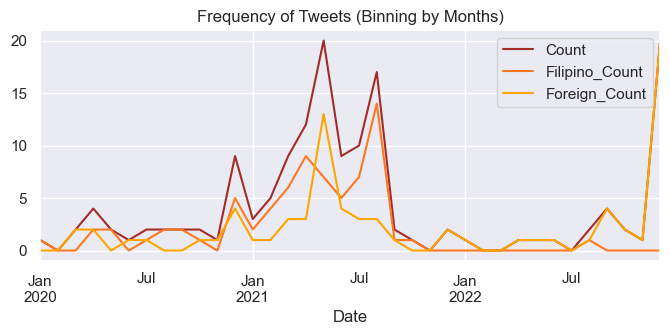

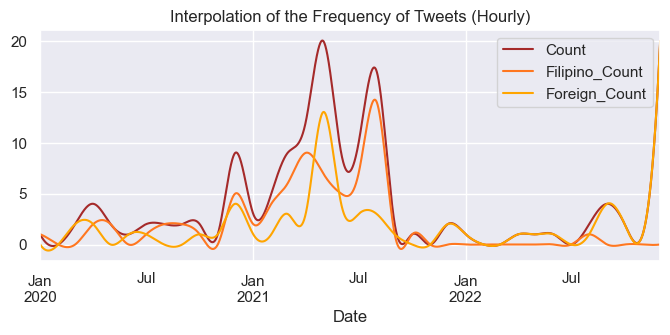

In [233]:
color_dict = {'Count':'brown', 'Filipino_Count':'#FF7720', 'Foreign_Count':'orange'}
df_bin.plot(figsize=(8,3), color=[color_dict.get(x, '#333333') for x in df_bin.columns])
plt.title("Frequency of Tweets (Binning by Months)")

df_interpolated.plot(figsize=(8,3), color=[color_dict.get(x, '#333333') for x in df_interpolated.columns])
plt.title("Interpolation of the Frequency of Tweets (Hourly)")